In [1]:
import pickle as pk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pk.load(open("../results/cnn_results/misclassified_test.pkl", "rb"))

In [3]:
len(data['Eccentric'])

419

In [4]:
df = pd.read_csv('../results/test_data_parameters.csv')

In [5]:
mis_ecc = []
mis_lens = []
mis_unlensed = []

for i in data.keys():
    if i == 'Eccentric':
        for j in data[i]:
            idx = int(j.split('_')[1].split('.')[0])
            val = [df['eccentricity'].loc[idx], df['eccentric_snr'].loc[idx]]
            mis_ecc.append(val)

    elif i == 'Lensed':
        for j in data[i]:
            idx = int(j.split('_')[1].split('.')[0])
            val = [df['m_lens'].loc[idx], df['y_lens'].loc[idx], df['lensed_snr'].loc[idx]]
            mis_lens.append(val)

    elif i == 'Unlensed':
        for j in data[i]:
            idx = int(j.split('_')[1].split('.')[0])
            mis_unlensed.append(df['unlensed_snr'].loc[idx])

mis_ecc = np.array(mis_ecc)
mis_lens = np.array(mis_lens)
mis_unlensed = np.array(mis_unlensed)


Text(0, 0.5, 'Eccentric SNR')

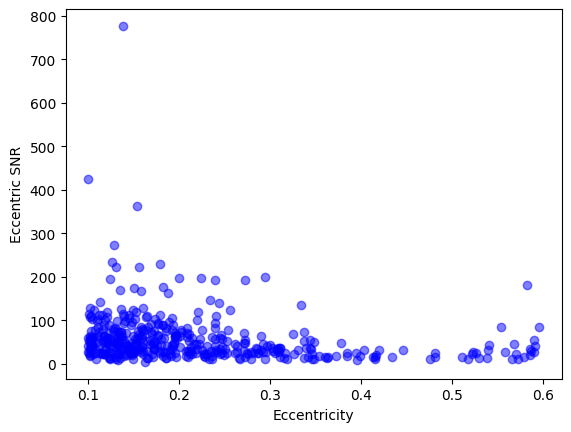

In [6]:
plt.scatter(mis_ecc[:, 0], mis_ecc[:, 1], label = 'Eccentric', color = 'blue', alpha = 0.5)
plt.xlabel('Eccentricity')
plt.ylabel('Eccentric SNR')

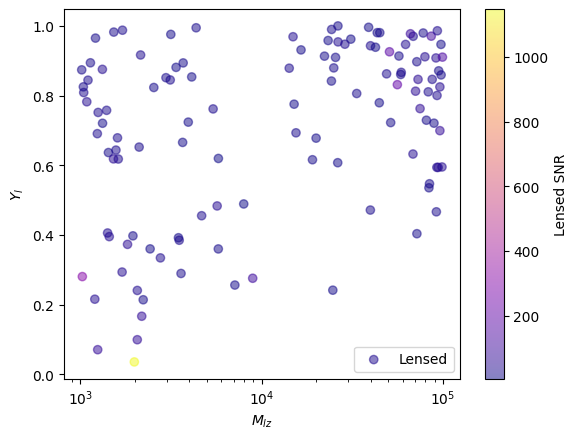

In [7]:
sc = plt.scatter(
    mis_lens[:, 0],                           # Normalized M_lens
    mis_lens[:, 1],                           # Y_lens
    c=mis_lens[:, 2],                         # Color mapped to Lensed SNR
    cmap='plasma',                              # Optional: color map
    label='Lensed',
    alpha=0.5
)

plt.xscale('log')
plt.xlabel('$M_{lz}$')
plt.ylabel('$Y_l$')
plt.colorbar(sc, label='Lensed SNR')
plt.legend()

Text(0, 0.5, 'Counts')

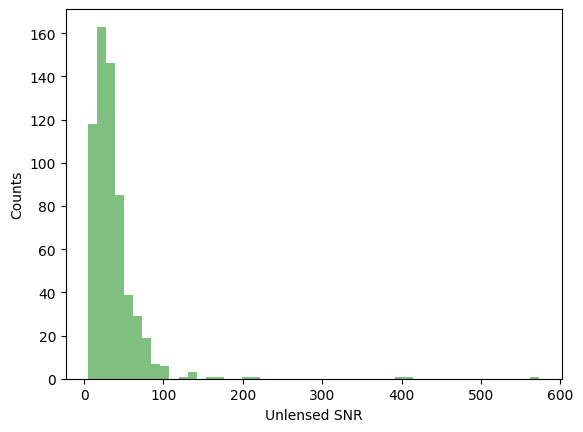

In [8]:
plt.hist(mis_unlensed, bins=50, color='green', alpha=0.5, label='Unlensed SNR')
plt.xlabel('Unlensed SNR')
plt.ylabel('Counts')